# Local Binary Pattern feature extraction

In this session, we will discuss about how to find a binary pattern using the pixel value of the image.
When we store an image in computers or digitally, it’s corresponding pixel values are stored. So, when we read an image to a variable using OpenCV in Python, the variable stores the pixel values of the image.

### LBP
There are lots of different types of **texture** descriptors are used to extract features of an image. Local Binary Pattern, also known as LBP, is a simple and grey-scale invariant texture descriptor measure for classification. In LBP, a binary code is generated at each pixel by thresholding it’s neighbourhood pixels to either 0 or 1 based on the value of the centre pixel.

The rule for finding LBP of an image is as follows:

1. Set a pixel value as center pixel.
2. Collect its neighbourhood pixels (Here I am taking a 3 x 3 matrix so; total number of neighbourhood pixel is 8)
3. Threshold it’s neighbourhood pixel value to 1 if its value is greater than or equal to centre pixel value otherwise threshold it to 0.
4. After thresholding, collect all threshold values from neighbourhood either clockwise or anti-clockwise. The collection will give you an 8-digit binary code. Convert the binary code into decimal.
5. Replace the center pixel value with resulted decimal and do the same process for all pixel values present in image.

## Example

Let’s take an example to understand it properly.

Let’s take a pixel value from the above output to find its binary pattern from its local neighbourhood. So, I am taking a value ‘149’ (present at 15th row and 19nd column) and its 8 neighbourhood pixels to form a 3 x 3 matrix.

![lbp](dataset/imgs/lbp1.jpg)

Collect the thresholding values either clockwise or anti-clockwise. Here, I am collecting them clockwise from top-left. So, after collecting, the binary value will be as follows:


![lbp](dataset/imgs/lbp2.jpg)

Then, convert the binary code into decimal and place it at center of matrix.


```
128 + 64 + 32 + 0 + 0 + 0 + 0 + 1 = 225
```


Now, the resulted matrix will look like,

![lbp](dataset/imgs/lbp3.jpg)


# Implementation LBP Algorithm in python

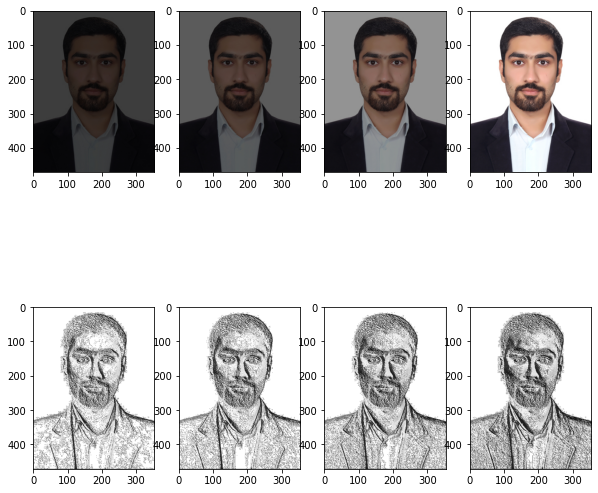

LBP Program is finished


In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
   
      
def get_pixel(img, center, x, y):
      
    new_value = 0
      
    try:
        # If local neighbourhood pixel 
        # value is greater than or equal
        # to center pixel values then 
        # set it to 1
        if img[x][y] >= center:
            new_value = 1
              
    except:
        # Exception is required when 
        # neighbourhood value of a center
        # pixel value is null i.e. values
        # present at boundaries.
        pass
      
    return new_value
   
# Function for calculating LBP
def lbp_calculated_pixel(img, x, y):
   
    center = img[x][y]
   
    val_ar = []
      
    # top_left
    val_ar.append(get_pixel(img, center, x-1, y-1))
      
    # top
    val_ar.append(get_pixel(img, center, x-1, y))
      
    # top_right
    val_ar.append(get_pixel(img, center, x-1, y + 1))
      
    # right
    val_ar.append(get_pixel(img, center, x, y + 1))
      
    # bottom_right
    val_ar.append(get_pixel(img, center, x + 1, y + 1))
      
    # bottom
    val_ar.append(get_pixel(img, center, x + 1, y))
      
    # bottom_left
    val_ar.append(get_pixel(img, center, x + 1, y-1))
      
    # left
    val_ar.append(get_pixel(img, center, x, y-1))
       
    # Now, we need to convert binary
    # values to decimal
    power_val = [1, 2, 4, 8, 16, 32, 64, 128]
   
    val = 0
      
    for i in range(len(val_ar)):
        val += val_ar[i] * power_val[i]
          
    return val


path1 = 'dataset/face/1.png'
path2 = 'dataset/face/2.jpg'
path3 = 'dataset/face/3.jpg'
path4 = 'dataset/face/4.jpg'

img_bgr_1 = cv2.imread(path1, 1)
img_bgr_2 = cv2.imread(path2, 1)
img_bgr_3 = cv2.imread(path3, 1)
img_bgr_4 = cv2.imread(path4, 1)
   
height, width, _ = img_bgr_1.shape
   
# We need to convert RGB image 
# into gray one because gray 
# image has one channel only.
img_gray_1 = cv2.cvtColor(img_bgr_1, cv2.COLOR_BGR2GRAY)
img_gray_2 = cv2.cvtColor(img_bgr_2, cv2.COLOR_BGR2GRAY)
img_gray_3 = cv2.cvtColor(img_bgr_3, cv2.COLOR_BGR2GRAY)
img_gray_4 = cv2.cvtColor(img_bgr_4, cv2.COLOR_BGR2GRAY)

# Create a numpy array as 
# the same height and width 
# of RGB image
img_lbp_1 = np.zeros((height, width), np.uint8)
img_lbp_2 = np.zeros((height, width), np.uint8)
img_lbp_3 = np.zeros((height, width), np.uint8)
img_lbp_4 = np.zeros((height, width), np.uint8)
   
for i in range(0, height):
    for j in range(0, width):
        img_lbp_1[i, j] = lbp_calculated_pixel(img_gray_1, i, j)
        img_lbp_2[i, j] = lbp_calculated_pixel(img_gray_2, i, j)
        img_lbp_3[i, j] = lbp_calculated_pixel(img_gray_3, i, j)
        img_lbp_4[i, j] = lbp_calculated_pixel(img_gray_4, i, j)


img_bgr_1 = cv2.cvtColor(img_bgr_1, cv2.COLOR_BGR2RGB)
img_bgr_2 = cv2.cvtColor(img_bgr_2, cv2.COLOR_BGR2RGB)
img_bgr_3 = cv2.cvtColor(img_bgr_3, cv2.COLOR_BGR2RGB)
img_bgr_4 = cv2.cvtColor(img_bgr_4, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.subplot(241), plt.imshow(img_bgr_1)
plt.subplot(245), plt.imshow(img_lbp_1, cmap ="gray")

plt.subplot(242), plt.imshow(img_bgr_2)
plt.subplot(246), plt.imshow(img_lbp_2, cmap ="gray")

plt.subplot(243), plt.imshow(img_bgr_3)
plt.subplot(247), plt.imshow(img_lbp_3, cmap ="gray")

plt.subplot(244), plt.imshow(img_bgr_4)
plt.subplot(248), plt.imshow(img_lbp_4, cmap ="gray")

plt.show()

print("LBP Program is finished")